# Tensorflow - Models training process - Fourth Exercise (25 minutes)
@author Tomasz Skrzypczyk

# Data import

In [31]:
# do not modify this cell
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()
columns = data.feature_names

X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model definition

In [32]:
# do not modify this cell
model = tf.keras.Sequential([tf.keras.layers.Dense(3, input_shape=(4,))])

# Model compiling

What you have to do first is to **compile** your model. This is different than what you are used to using sklearn or even using other DeepLearning libraries.


The training procedure is as follows:
* define your model
* compile it
* train using fit method


```
compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)
```

At this step you should at least pass the *loss* parameter. The loss function of your model. This could be 'mse' in case of a regression model or 'categorical_crossentropy' in case of the classification.

What you want to pass next is the *optimizer*. Setting the optimizer to 'adam' or using the default 'rmsprop' are frequent choices. You will learn about different optimizers later on.

The last important parameter to define are the *metrics*. You should always pass a list of metric's objects or strings. Ex. `metrics=["accuracy"]` or `metrics = ["mae"]`.





In [33]:
# compile your model, remember that this is a classification model
# define the 'adam' optimizer, use accuracy as a metric and set the loss to 'sparse_categorical_crossentropy'

model.compile(optimizer='adam', metrics='accuracy', loss='sparse_categorical_crossentropy')

# Model training

fit method

```
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

```

You really don't need to care about all the parameters!!

Tip: pass your validation data as a tuple (X,y) !!!

In [34]:
# run you training, pass the training data, training labels, validation data, set batch size to 32 and epochs to 100
history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 16ms/step - loss: 14.0732 - accuracy: 0.0165 - val_loss: 10.8094 - val_accuracy: 0.0714
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 14.0294 - accuracy: 0.0165 - val_loss: 10.7931 - val_accuracy: 0.0714
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 14.0169 - accuracy: 0.0165 - val_loss: 10.7781 - val_accuracy: 0.0714
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 14.0063 - accuracy: 0.0165 - val_loss: 10.7641 - val_accuracy: 0.0714
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 13.9968 - accuracy: 0.0248 - val_loss: 10.7511 - val_accuracy: 0.0714
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 13.9196 - accuracy: 0.0248 - val_loss: 10.0246 - val_accuracy: 0.0714
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 13.8992 - accuracy: 0.0248 - val_loss: 9.9451 - val_accuracy: 0.0714
Epoch 8/100
4

4/4 [==============================] - 0s 3ms/step - loss: 12.0330 - accuracy: 0.1322 - val_loss: 7.0350 - val_accuracy: 0.4286
Epoch 60/100
4/4 [==============================] - 0s 4ms/step - loss: 12.0191 - accuracy: 0.1322 - val_loss: 7.0102 - val_accuracy: 0.4286
Epoch 61/100
4/4 [==============================] - 0s 4ms/step - loss: 12.0043 - accuracy: 0.1488 - val_loss: 6.9849 - val_accuracy: 0.4286
Epoch 62/100
4/4 [==============================] - 0s 3ms/step - loss: 11.9900 - accuracy: 0.1488 - val_loss: 6.9575 - val_accuracy: 0.4286
Epoch 63/100
4/4 [==============================] - 0s 4ms/step - loss: 11.9749 - accuracy: 0.1570 - val_loss: 6.9287 - val_accuracy: 0.4286
Epoch 64/100
4/4 [==============================] - 0s 3ms/step - loss: 11.9603 - accuracy: 0.1570 - val_loss: 6.8991 - val_accuracy: 0.4286
Epoch 65/100
4/4 [==============================] - 0s 4ms/step - loss: 11.9410 - accuracy: 0.1570 - val_loss: 6.8672 - val_accuracy: 0.4286
Epoch 66/100
4/4 [========

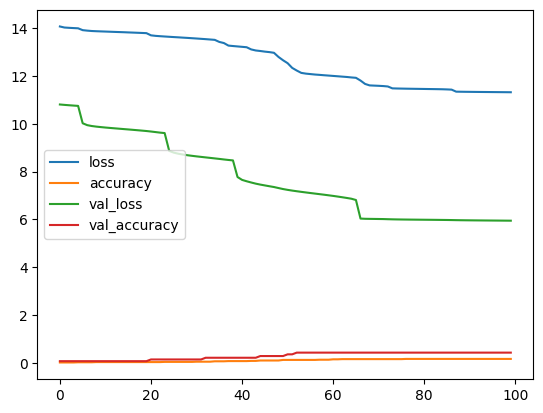

In [39]:
# if you create a dataframe using the history.history object you can easily plot the learning curves by using the plot method.
# Try it out

df = pd.DataFrame(history.history).plot()

# if you are not sure how to do it see the tutorial:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# Model usage

If you want to make predictions an the test set, simplu use the predict method.



```
predict(
    x,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
```

The only argument you should care about is the x - your data


In [36]:
# make predictions on the test set

predictions = model.predict(X_test)
predictions # logits ak. logity

1/1 [==============================] - 0s 18ms/step


array([[-0.07701854,  0.19711223,  0.03925822],
       [-0.9964558 , -0.10443588, -0.7182832 ],
       [ 0.66622066,  0.9752186 , -1.435484  ],
       [-0.09746598,  0.17425662, -0.07358746],
       [ 0.21636233,  0.38012683, -0.5020407 ],
       [-0.65180933, -0.41522226,  0.3311459 ],
       [-0.15918851, -0.12684052,  0.48311535],
       [ 0.16105601,  0.6138326 , -1.3712158 ],
       [ 0.66517603, -0.12021911,  1.183021  ],
       [ 0.0363214 , -0.10744327,  0.6716707 ],
       [-0.16571689,  0.5723335 , -1.2531154 ],
       [-0.5424032 , -0.769203  ,  1.6134822 ],
       [-0.73916084, -0.38919225,  0.14425987],
       [-0.62026435, -0.67422223,  1.3164535 ],
       [-1.1825953 , -0.28902778, -0.24462433]], dtype=float32)

# Model evaluation

To evaluate your model, use the evaluate method. It will print the loss function value first and the metrics you passed to the model while compiling it.


```
evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs
)
```

Again, the only parameters you need to pass, and really care baout, are x and y






In [38]:
# evaluate your model using the test set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 10ms/step - loss: 10.6726 - accuracy: 0.2000


[10.672575950622559, 0.20000000298023224]